## **🔍 Objectives**

### **1. 실습 개요**
- 📊 **공공데이터 API 실습**  
- 🔄 **JSON, CSV, XML 데이터 처리 실습**  

---

### **2. 실습 진행 목적 및 배경**
- **공공데이터 API**를 통해 구조화된 데이터를 요청하고 응답받는 기술을 익힙니다.  
- **JSON, CSV, XML**과 같은 다양한 데이터 포맷의 구조를 이해하고 이를 변환하거나 저장하는 방법을 학습합니다.  
- 학습자는 데이터를 수집, 처리, 저장하는 유연한 워크플로우를 체득하게 됩니다.  

---

### **3. 실습 수행으로 얻어갈 수 있는 역량**
- 실시간 데이터를 **수집**하고 **분석**하는 기술 습득  
- 데이터를 다룰 때 **포맷 변환 및 저장 능력** 향상

---

### **4. 데이터셋 개요 및 저작권 정보**

#### **📁 데이터 개요**
- **데이터셋 이름**: 노령 인구 통계 데이터  
- **데이터 제공자**: 공공데이터포털 (대한민국 정부)  
- **내용**:  
  - 특정 연도의 노령 인구 통계를 제공 (전체 및 연령대별 인구).  
  - **분석 목적**: 정책 분석, 학술 연구, 보고서 작성 등.  
  - **형식**: XML 또는 JSON 응답 데이터.  
- **컬럼명 설명**:  
  - `year`: 데이터의 연도  
  - `all`: 전체 노령 인구 수  
  - `age65-69`: 65-69세 연령대 인구 수  
  - `age70-74`: 70-74세 연령대 인구 수  
  - `age75-79`: 75-79세 연령대 인구 수  
  - `age80-84`: 80-84세 연령대 인구 수  
  - `age85-89`: 85-89세 연령대 인구 수  
  - `age90u`: 90세 이상 인구 수  

#### **📜 저작권 정보**
- **소유자**: 보건복지부  
- **저작권 표시**: 공공의 이익을 위해 제공되며, 특정 조건에서 재사용 가능.  
- **출처**: [공공데이터포털](https://www.data.go.kr/)  

---

### **5. 실습 핵심 내용**
- 🔑 **API 키 발급 및 활용법 학습**  
- 📂 **JSON, CSV, XML 데이터 포맷 처리 실습**  


### **Prerequisites**

```
requests>=2.28.1
pandas>=1.3.0
jsonschema>=4.0.0
urllib3>=1.26.12

```


In [3]:
!pip install requests>=2.28.1 pandas>=1.3.0 jsonschema>=4.0.0 urllib3>=1.26.12


# API 데이터 수집
- JSON과 XML 데이터 구조 숙달
- 공공데이터 API 활용해보기
- 네이버 API 활용해보기


## 1. JSON
### 1-1. 데이터 저장
- 구글 드라이브를 마운트하여 구글 드라이브에 JSON 파일 저장

In [ ]:
# 이건 코랩환경에서하는거
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# 실행 결과 : Mounted at /content/gdrive

- 파일을 저장할 디렉토리 생성

In [5]:
import os
# my_path: 각자 데이터셋 파일이 있는 경로로 설정 바랍니다.
my_path = "/content/gdrive/MyDrive/"
if not os.path.exists(my_path):
    os.makedirs(my_path)
    print(f"'{my_path}' 폴더가 생성되었습니다.")
else:
    print(f"'{my_path}' 폴더가 이미 존재합니다.")


'/content/gdrive/MyDrive/' 폴더가 생성되었습니다.


- 여러 사이트의 아이디와 비밀번호 관리하는 JSON 파일
- 다른 사용자가 접근할 수 없는 곳에 저장해두고 불러서 사용

In [7]:
import json
admin={
    '1.name' : "hong gildong",
    '2.mysql' : { "id" :"mysql", "pass" : "12345" },
    '3.naver_api':{
        'id' : 'gildong',
        'api_key': 'my_naver_6789',
        'api_secret': "12345" },
    }
with open(os.path.join(my_path, 'admin_ex.json'), 'w') as f:
    json.dump(admin, f) #들여쓰기 옵션


### 1-2. JSON 읽기, 활용하기

- 코랩에서 프로그래밍할 때 구글 드라이브에 저장해놓고 보안키를 불러서 사용
- 타 사용자는 읽기 불가
- f.read()로 텍스트 읽기
- json.loads() 함수를 사용하여 파일 인식 처리

In [8]:
import json
import os


# JSON 파일 경로 생성
json_file_path = os.path.join(my_path, 'admin_ex.json')

# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    s = f.read()
    admin = json.loads(s)
    admin1 = admin['3.naver_api']  # JSON 데이터 접근

# 데이터 출력
print(s)
print(json.dumps(admin, indent=4))  # JSON 데이터 가독성 있게 출력
print(admin['3.naver_api']['api_key'])  # API 키 출력
print(admin1['api_key'], admin1['api_secret'])  # API 키와 시크릿 출력



{"1.name": "hong gildong", "2.mysql": {"id": "mysql", "pass": "12345"}, "3.naver_api": {"id": "gildong", "api_key": "my_naver_6789", "api_secret": "12345"}}
{
    "1.name": "hong gildong",
    "2.mysql": {
        "id": "mysql",
        "pass": "12345"
    },
    "3.naver_api": {
        "id": "gildong",
        "api_key": "my_naver_6789",
        "api_secret": "12345"
    }
}
my_naver_6789
my_naver_6789 12345


### 1-3. 데이터프레임으로 변환 저장

In [11]:
import json
import pandas as pd
df = pd.json_normalize(admin['2.mysql'])
json_csv = df.to_csv()
print(json_csv)
df


,id,pass
0,mysql,12345



,id,pass
0,mysql,12345


## 2. XML
### 2-1. 데이터 구조
- HTML과 유사한 구조
- JSON과 유사하게 데이터를 주고 받음

In [13]:
%%writefile test.xml
<?xml version="1.0" encoding="utf-8"?>
<world name = "주소록과 네이버 API 서비스키">
    <people name='김민국'>
        <age>15</age>
        <tall>183cm</tall>
        <add>서울시 서대문구</add>
    </people>
    <people name='박한솔' >
        <age>30</age>
        <tall>175cm</tall>
        <add>서울시 용산구</add>
    </people>
    <naver_api>
        <client_id>JXRlq56Db1L0PA</client_id>
        <client_secret>hwiniqqkgvH</client_secret>
    </naver_api>
</world>


Overwriting test.xml


### 2-2. XML 데이터 파싱

- root 노드에 world
- 하위 자식 노드에 두 개의 people 존재
- <> 태그 내에 들어가 있는 것 : 속성 (attributes)
- 속성의 이름인 name의 value인 '김민국', '박한솔'
- 파이썬에서 xml 문서를 파싱하기 위해서는 xml.etree.ElementTree 모듈 사용
- 시작 태그와 /의 종료 태그 사이에 위치한 텍스트들이 실제 표현하고자 하는 내용
- XML을 읽어 특정 내용을 추출하기 위해서 XML 문서를 ET.parse로 파싱하고 getroot() 메소드를 이용해 루트 태그를 추출하고 반복문을 이용해 자식 노드의 태그와 속성 추출

In [20]:
import xml.etree.ElementTree as ET
tree = ET.parse("test.xml")
root = tree.getroot()
print('root.tag : ',root.tag)
print('name :', root.get('name'))
print(root[0][1].text)
print('--------------------------------')
for child in root:
    print(child.tag, child.attrib)
print('--------------------------------')
for add in root.iter('add'):
    print(add.text)


root.tag :  world
name : 주소록과 네이버 API 서비스키
183cm
--------------------------------
people {'name': '김민국'}
people {'name': '박한솔'}
naver_api {}
--------------------------------
서울시 서대문구
서울시 용산구


- bs4 활용하여 파싱 후 텍스트 데이터 추출

In [25]:
from bs4 import BeautifulSoup as bs
with open("test.xml", 'r',encoding='utf-8') as f:
    xml_doc = f.read()
soup = bs(xml_doc, 'xml')
for row in soup.find_all('people'):
    print(row.get('name'))
    print(row.age.text)
    print(row.tall.text)
    print(row.add.text)
    print('----------------------')
print(soup.world.naver_api.client_id.text, soup.world.naver_api.client_secret.text)


김민국
15
183cm
서울시 서대문구
----------------------
박한솔
30
175cm
서울시 용산구
----------------------
JXRlq56Db1L0PA hwiniqqkgvH


### 2-3. 데이터 프레임으로 저장
- 세부적인 자식노드의 속성은 attrib.get() 메서드 이용해서 내용을 추출
- 태그 사이의 내용은 tag.text를 이용하여 추출

In [26]:
import pandas as pd
persons=[]
for p in soup.find_all('people') :
    persons.append({ "이름" : p.get("name"),
                 '나이': p.age.text,
                 "키": p.tall.text,
                 '주소':p.add.text})
df = pd.DataFrame(persons)
df


,이름,나이,키,주소
0,김민국,15,183cm,서울시 서대문구
1,박한솔,30,175cm,서울시 용산구


- UTF-8이 아닌 EUC-KR이나 cp949일경우 decode('cp949')로 변경
- urllib과 bs4의 find 문 활용한 웹 크롤링 방식

In [27]:
# urllib 라이브러리에서 urlopen 함수를 import
from urllib.request import urlopen

# BeautifulSoup 모듈에서 BeautifulSoup 클래스를 bs라는 이름으로 import
from bs4 import BeautifulSoup as bs

# 웹 페이지 요청 및 응답 객체 가져오기
# 'https://ai-bigdataanalysis.blogspot.com/2024/03/html.html' 페이지에 접근하여 응답 객체를 response 변수에 저장
response = urlopen('https://ai-bigdataanalysis.blogspot.com/2024/03/html.html')

# 응답된 HTML 문서를 읽어와서 바이너리 데이터를 문자열로 디코딩
html_doc = response.read().decode()

# BeautifulSoup 객체 생성 및 HTML 파싱
# HTML 소스를 BeautifulSoup을 사용하여 파싱하고 soup 변수에 저장
soup = bs(html_doc, 'html.parser')

# 특정 div 태그를 선택하여 해당 콘텐츠 가져오기
# 클래스가 'post-body entry-content'인 div 태그를 찾음
content = soup.find("div", {"class": "post-body entry-content"})

# 텍스트를 저장할 변수 초기화
text = ""

# 찾은 div 태그 내부에서 모든 <span> 태그를 순회하면서 텍스트를 추출
if content:  # content가 None이 아닐 경우에만 실행
    for para in content.find_all("span"):
        # 각 <span> 태그의 텍스트를 가져와서 양쪽 공백 제거 후 text 변수에 추가
        text += para.text.strip()

# 최종적으로 수집된 텍스트 출력
print(text)


참조 :https://wikidocs.net/1278461. HTML 구조의 이해HTML은 웹 문서를 만들기 위하여 사용하는 기본적인 웹 언어의 한 종류이다. 하이퍼텍스트를 작성하기 위해 개발되었으며 인터넷 서비스의 하나인 월드와이드웹(WWW)을 통해서 볼 수 있는 문서를 만들 때 사용하는 웹 언어의 한 종류이다. 특히 인터넷에서 웹을 통해 접근되는 대부분의 웹 페이지들은 HTML로 작성되는데 문서의 글자 크기, 글자색, 글자모양, 그래픽, 문서이동(하이퍼링크) 등을 정의하는 명령어들이 있다. HTML에서 사용하는 명령어는 태그(tag)라고 하는데 꺽쇠괄호'<>'를 사용하여 나타낸다. HTML 문서는 크게 Head 부분과 Body로 나누어지는데 Head 부분에는 문서의 제목을 포함한 기본적인 정보들을 포함하고 있으며 Body 부분에는 실제 웹 페이지에 나타나는 본문 내용으로 구성된다. 그래서 이러한 구조를 간단하게 요약해서 표기하면 아래와 같은 그림으로 표현할 수 있다.좀더 구체적으로 위에 그림 중에 본문 문단을 의미하는 p 태그의 코드 기준으로 설명하면 HTML 요소는 시작 태그와 /로 시작하는 종료 태그 사이에 내용들이 들어 있으며, 시작 태그 안에는 속성명(Attributes) 'class'와 속성값(Values) 'para'를 포함하고 있고, '빅데이터 분석과 활용'이라는 내용을 포함하고 있는 태그이다.보다 다양한 HTML 태그에 대한 이해를 위해서 자주 사용하는 태그들을 표의 형태로 정리하면 아래와 같다.이러한 구조를 사람이 보기 편한 Text 문서로 파싱하기 위해서는 BeautifulSoup라는 라이브러리를 이용해야 한다.이라는 파이썬 라이브러리는 이와 같이 HTML 문서를 파싱하여 텍스트 데이터를 추출할 수 있는 유용한 도구이다.2.HTML 문서의 사례와 텍스트 추출이해를 돕기위해 아래와 같이 HTML 소스코드를 아래와 같이 작성하여 '웹크롤링 연습.html'로 파일을 저장하고 웹브라우저로 열어보면 HTML로 작성된 문서의 규칙을 이해할 수 있다.

## 3. 공공데이터 API
- 각 자료들을 활용하기 위한 Service key 확보 (강의 내용 확인)
- 미리 공공데이터 API 발급 신청을 완료한 상태에서 진행이 가능합니다
- 각 파일들을 다운로드 받아서 어떻게 다른지 직접 확인해봅니다
### 3-1. XML API 활용
- API_KEY: 발급받은 공공데이터 포털 API 키를 입력합니다
- BASE_URL: 공공데이터 API의 엔드포인트 URL을 입력합니다
- params: API 문서에서 요구하는 파라미터를 추가로 정의합니다
- XML 파싱: 응답 데이터를 XML로 파싱하고 필요한 정보를 추출합니다

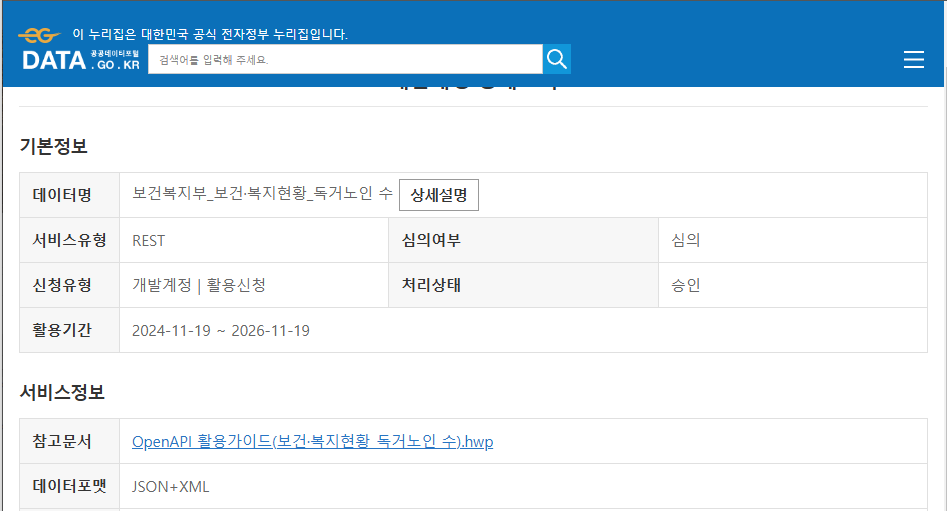
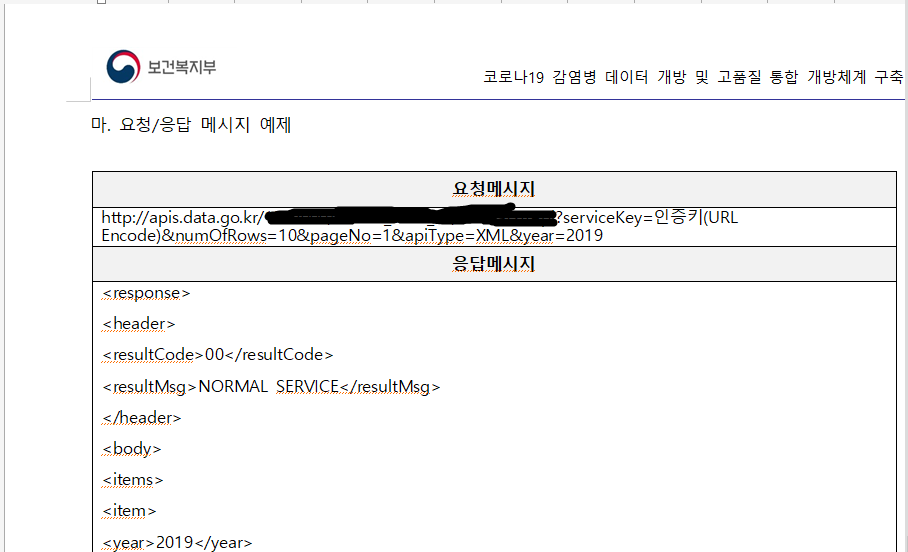
- 참고문서에 있는 한글 파일 다운로드
- 한글 파일에서 요청메시지 항목을 찾기
- 요청 메시지의 검정색 가려져 있는 부분이 엔드포인트 URL
- 요청 메시지의 인증키 뒷 부분(numOfRow=10, pageNo=1, apiType=XML, year=2019)가 params에 해당됨
- 서비스키는 해당 웹사이트 페이지에 일반인증키가 해당됨

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

- 디렉토리 존재 유무 확인 필수
- 새로운 XML 파일 생성

In [28]:
%%writefile /content/gdrive/MyDrive/elderly_person.xml
<?xml version="1.0" encoding="utf-8"?>
<body>
    <elderly>
    <serviceKey>qti9hzkkxlvaMjcYZ4mXJgiIjBBNk0K0zpniWtIKAHbrv5aE0WqKoSvrN2ZEd8GoLhGWgKAMKsP7wV6GbyazjQ%3D%3D</serviceKey>
    </elderly>
</body>


Writing /content/gdrive/MyDrive/elderly_person.xml


- 파일을 읽고 서비스 키를 추출한다

In [30]:
import bs4
# 공통 경로 설정
my_path = "/content/gdrive/MyDrive"

# 파일 경로 생성
file_path = os.path.join(my_path, "elderly_person.xml")

# XML 파일 읽기
with open(file_path, 'r') as f:
    xml_doc = f.read()
elderly_person = bs4.BeautifulSoup(xml_doc, features="xml")
my_key = elderly_person.body.elderly.serviceKey.text


- 요청에 필요한 항목들을 정리한다 (항목들을 모두 연결하면 한글 파일의 요청메시지와 같아짐)

In [31]:
url = 'http://apis.data.go.kr/1352000/ODMS_STAT_24/callStat24Api?'
params ='&numOfRows=10&pageNo=1&apiType=XML&year=2019'
servicekey = f'&serviceKey={my_key}'
print(url+params+servicekey)


http://apis.data.go.kr/1352000/ODMS_STAT_24/callStat24Api?&numOfRows=10&pageNo=1&apiType=XML&year=2019&serviceKey=qti9hzkkxlvaMjcYZ4mXJgiIjBBNk0K0zpniWtIKAHbrv5aE0WqKoSvrN2ZEd8GoLhGWgKAMKsP7wV6GbyazjQ%3D%3D


- 한글 파일의 응답메시지를 참고하면 <item>에 필요한 정보들이 있는 것을 확인할 수 있다

In [32]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

result=urlopen(url+servicekey+params)
house=BeautifulSoup(result, 'lxml-xml')
items=house.find_all('item')

In [33]:
print(items) #출력으로 확인하며 응답메시지와 비교하면 같다는 것을 알 수 있다

[<item>
<year>2019</year>
<all>1500413</all>
<age65-69>379377</age65-69>
<age70-74>339066</age70-74>
<age75-79>348966</age75-79>
<age80-84>260141</age80-84>
<age85-89>126045</age85-89>
<age90u>46818</age90u>
</item>]


- 가져온 정보들을 csv 파일로 저장

In [34]:
import os
import csv
import pandas as pd

# CSV 파일 경로 생성
csv_file_path = os.path.join(my_path, "elderly_person.xml.csv")

# CSV 파일 생성 및 데이터 저장
with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)

    # 헤더 작성
    header = ['year', 'all', 'age65-69', 'age70-74', 'age75-79', 'age80-84', 'age85-89', 'age90u']
    writer.writerow(header)

    # 데이터 추출 및 작성
    # items는 BeautifulSoup 또는 다른 데이터 소스로부터 생성된 리스트라고 가정
    for item in items:
        row = [
            item.find('year').text if item.find('year') else '',
            item.find('all').text if item.find('all') else '',
            item.find('age65-69').text if item.find('age65-69') else '',
            item.find('age70-74').text if item.find('age70-74') else '',
            item.find('age75-79').text if item.find('age75-79') else '',
            item.find('age80-84').text if item.find('age80-84') else '',
            item.find('age85-89').text if item.find('age85-89') else '',
            item.find('age90u').text if item.find('age90u') else '',
        ]
        writer.writerow(row)

print(f"CSV 파일이 생성되었습니다: {csv_file_path}")

# 저장된 CSV 파일 읽기 및 출력
print("\nCSV 파일의 내용:")
with open(csv_file_path, mode='r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        print(row)


CSV 파일이 생성되었습니다: /content/gdrive/MyDrive\elderly_person.xml.csv

CSV 파일의 내용:
['year', 'all', 'age65-69', 'age70-74', 'age75-79', 'age80-84', 'age85-89', 'age90u']
['2019', '1500413', '379377', '339066', '348966', '260141', '126045', '46818']


### 3-2. JSON API 활용
- apiType만 바뀜

In [35]:
# JSON 데이터 생성 및 저장
elderly_person = {
    'elderly': {
        "serviceKey": "qti9hzkkxlvaMjcYZ4mXJgiIjBBNk0K0zpniWtIKAHbrv5aE0WqKoSvrN2ZEd8GoLhGWgKAMKsP7wV6GbyazjQ%3D%3D"
    }
}

# JSON 파일 경로 생성
json_file_path = os.path.join(my_path, "elderly.json")

with open(json_file_path, 'w') as f:
    json.dump(elderly_person, f)

print(f"JSON 파일이 생성되었습니다: {json_file_path}")

JSON 파일이 생성되었습니다: /content/gdrive/MyDrive\elderly.json


In [36]:
# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    data = json.load(f)

# 서비스 키 추출
service_key = data['elderly']['serviceKey']

# API 호출
url = 'http://apis.data.go.kr/1352000/ODMS_STAT_24/callStat24Api?'
params = '&numOfRows=10&pageNo=1&apiType=XML&year=2019'
servicekey = f'&serviceKey={service_key}'
result = urlopen(url + params + servicekey)


- 가져온 파일들을 json 형식으로 저장

In [37]:
house = BeautifulSoup(result, 'lxml-xml')
items = house.find_all('item')

# JSON 출력 파일 경로 생성
json_output_file = os.path.join(my_path, "elderly_data.json")

# JSON 변환 및 저장
json_data = {"items": []}

for item in items:
    json_data["items"].append({
        "year": item.find('year').text if item.find('year') else '',
        "all": item.find('all').text if item.find('all') else '',
        "age65-69": item.find('age65-69').text if item.find('age65-69') else '',
        "age70-74": item.find('age70-74').text if item.find('age70-74') else '',
        "age75-79": item.find('age75-79').text if item.find('age75-79') else '',
        "age80-84": item.find('age80-84').text if item.find('age80-84') else '',
        "age85-89": item.find('age85-89').text if item.find('age85-89') else '',
        "age90u": item.find('age90u').text if item.find('age90u') else '',
    })

# JSON 데이터 저장
with open(json_output_file, 'w', encoding='utf-8') as json_file:
    json.dump(json_data, json_file, ensure_ascii=False, indent=4)

print(f"XML 응답 데이터를 JSON 형식으로 저장하였습니다: {json_output_file}")

# 저장된 JSON 데이터 출력
print("\n저장된 JSON 데이터:")
print(json.dumps(json_data, ensure_ascii=False, indent=4))

XML 응답 데이터를 JSON 형식으로 저장하였습니다: /content/gdrive/MyDrive\elderly_data.json

저장된 JSON 데이터:
{
    "items": [
        {
            "year": "2019",
            "all": "1500413",
            "age65-69": "379377",
            "age70-74": "339066",
            "age75-79": "348966",
            "age80-84": "260141",
            "age85-89": "126045",
            "age90u": "46818"
        }
    ]
}
